In [12]:
from data_import import *
import matplotlib.pyplot as plt

# LOAD THE DATA AND SPLIT UP THINGS
X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy()

print(X_tr.shape)

(10212, 2500)


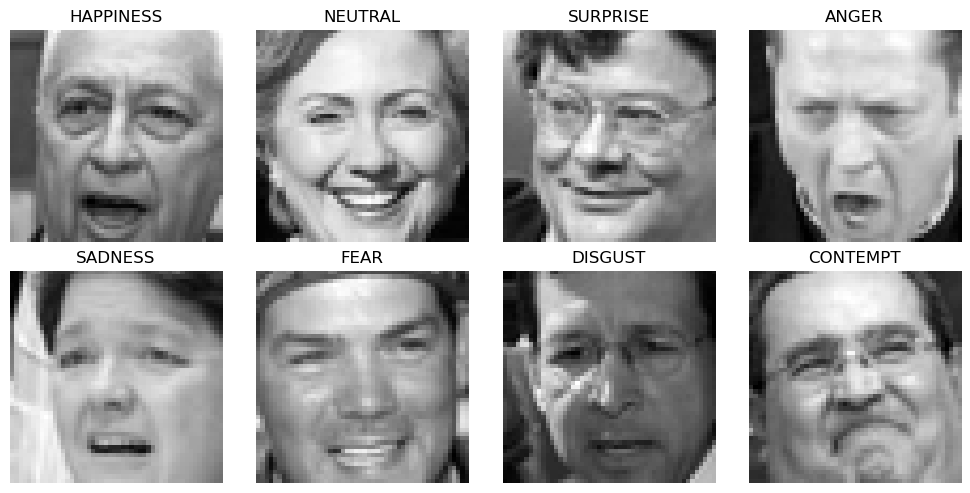

In [13]:
# Dictionary to store one sample per class
unique_samples = {}

# Collect one sample per class
for i in range(len(Y_tr)):
    label = classes[Y_tr[i]]  # Get the class name
    if label not in unique_samples:
        unique_samples[label] = (X_tr[i], filepaths[i])
        if len(unique_samples) == 8:  # Stop when we have 8 samples
            break

# Number of rows and columns
rows, cols = 2, 4

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each image
for ax, (label, (image, filepath)) in zip(axes, unique_samples.items()):
    ax.imshow(image.reshape(50, 50), cmap='gray')
    ax.set_title(label)
    ax.axis('off')  # Hide axes for clarity

# Hide any unused subplots
for ax in axes[len(unique_samples):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# TRAIN MODEL

# sklearn's mlp classifier requires flat data, so we flattened it

errors = []


# nn = MLPClassifier(hidden_layer_sizes=[128, 64],
#                     activation='relu',
#                     solver='sgd',
#                     batch_size = 256,
#                     learning_rate='constant',
#                     learning_rate_init=0.001)

nn = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200)


nn.fit(X_tr, Y_tr)
error_curve_train = nn.loss_curve_

# plt.plot(error_curve_train)
# plt.xlim(0, 100)
# plt.show()

# y_pred = nn.predict(X_val)
# print(len(y_pred))
err = 1 - nn.score(X_val, Y_val)
print(f"Error: {err}")
# print(f"Predicted: {y_pred}   Actual: {Y_val}")

# print(classification_report(Y_val, y_pred))

# GRAPH

Error: 0.47199373286329804


In [28]:
# RELOAD DATA FOR CNN
# X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy()


X_tr = np.reshape(X_tr, (-1, 50, 50, 1))
# Y_tr = np.reshape(Y_tr, (-1, 50, 50, 1))
X_val = np.reshape(X_val, (-1, 50, 50, 1))
# Y_val = np.reshape(Y_val, (-1, 50, 50, 1))


print(X_tr.shape)
print(X_val.shape)

(10212, 50, 50, 1)
(2553, 50, 50, 1)


In [34]:
# CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Example data setup: replace with your own dataset
# Assuming `X_train`, `X_test`, `y_train`, `y_test` are ready

# Reshape data
X_tr = np.reshape(X_tr, (-1, 50, 50, 1))
X_val = np.reshape(X_val, (-1, 50, 50, 1))


# Normalize the image pixel values
X_tr = X_tr.astype('float32') / 255.0  # Scale to [0, 1]
X_val = X_val.astype('float32') / 255.0

# If images are grayscale, add a channel dimension
X_tr = X_tr[..., tf.newaxis]  # Shape: (num_samples, 50, 50, 1)
X_val = X_val[..., tf.newaxis]

# If labels are integers (e.g., 0, 1, ..., num_classes-1), convert to one-hot
from tensorflow.keras.utils import to_categorical
num_classes = len(set(Y_tr))
Y_tr = to_categorical(Y_tr, num_classes)
Y_val = to_categorical(Y_val, num_classes)

# Build the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

# L2 Regularized model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {accuracy * 100:.2f}%")






Epoch 1/10


/opt/miniconda3/envs/cs178/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 8, 8), output.shape=(None, 8)